> #### Murilo Holtz Foltran 133770

```
projeto de Inteligência Artificial pela Unifesp
Profª Drª Lilian Berton
detectar câncer de mama através de uma base de dado
detectar = classificação por machine learning
```




In [ ]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8592 sha256=ac07cd484bf39a0c1fadfceb3aa7ebb99f559c6716a38bfc5509092bb35ca057
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from pylab import pcolor, colorbar
from sklearn.model_selection import train_test_split

arq = files.upload() # base de dado a ser upada
path = list(arq.keys())[0] # pegando o nome
df = pd.read_csv(path) # lendo em um dataframe
df.head()

Saving dataBC.csv to dataBC (1).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# shape: formato dos dados (linhas: populacao; colunas: info)
populacao, info = df.shape[0], df.shape[1]
print('Populaçao: {}; Colunas: {}'.format(populacao, info))

Populaçao: 569; Colunas: 33


In [ ]:
# contanto os valores vazios (empty values: NaN, NAN, na, '')
emptyValues = df.isna()
# display(emptyValues)
display(emptyValues.sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Unnamed: 32 - coluna com 569 valores vazios
df = df.dropna(axis=1)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


B    357
M    212
Name: diagnosis, dtype: int64



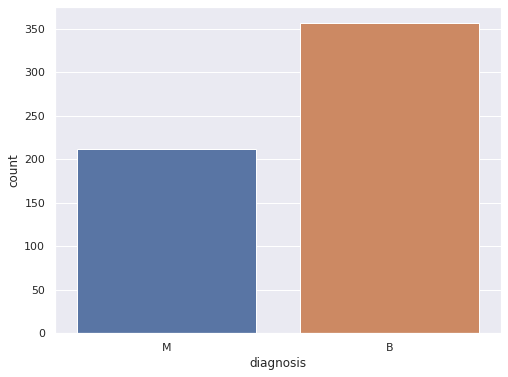

In [ ]:
print('{}\n'.format(df['diagnosis'].value_counts()))
# visualizando: 
sns.set_theme(style="darkgrid", palette='Set1', color_codes=True)
sns.set(rc={'figure.figsize':(8,6)})
graphDiagnosis = sns.countplot(x = df['diagnosis'])

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# trocando M e B por 1 e 0, para melhor criaçao e analise dos dados
df.iloc[:,1] = LabelEncoder().fit_transform(df.iloc[:,1].values)
print(LabelEncoder().fit_transform(df.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

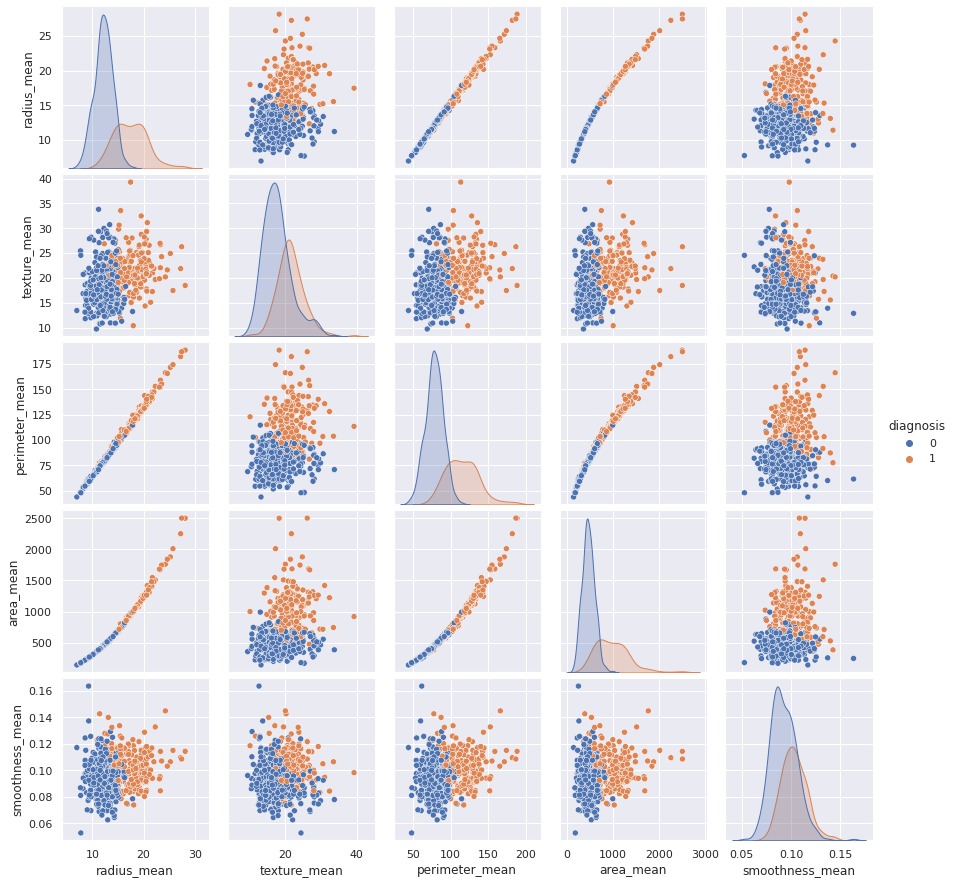

In [ ]:
sns.pairplot(df.iloc[:,1:7], hue="diagnosis")

# azul: benigno
# laranja: maligno

In [ ]:
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [ ]:
# correlações entre colunas
df.iloc[:,1:12].corr() # ignorando id

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


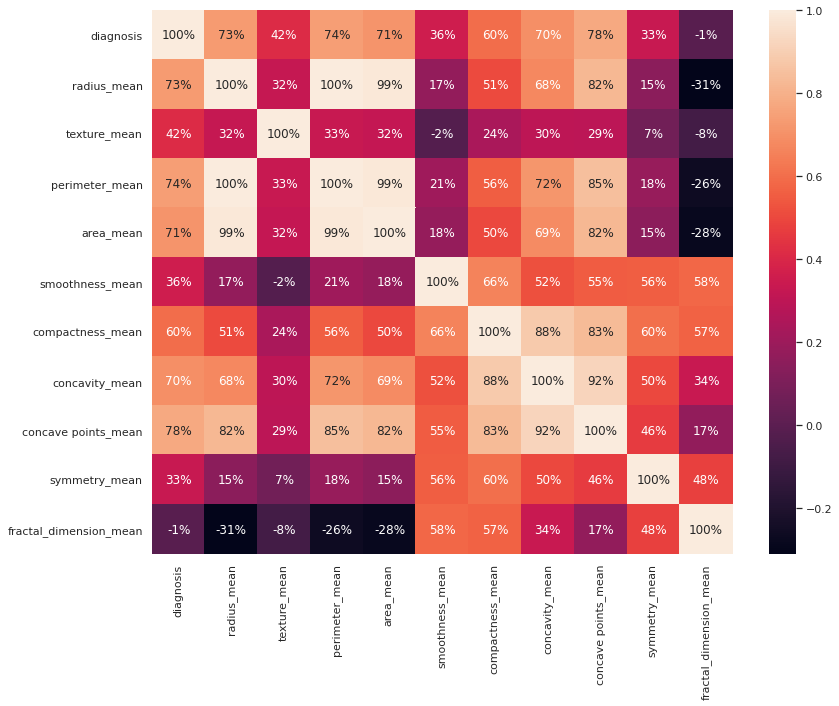

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%') # mapa de calor

In [ ]:
# criando dados independentes e dependentes
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

X

array([[ 17.99  ,  10.38  , 122.8   , ...,   0.7119,   0.2654,   0.4601],
       [ 20.57  ,  17.77  , 132.9   , ...,   0.2416,   0.186 ,   0.275 ],
       [ 19.69  ,  21.25  , 130.    , ...,   0.4504,   0.243 ,   0.3613],
       ...,
       [ 16.6   ,  28.08  , 108.3   , ...,   0.3403,   0.1418,   0.2218],
       [ 20.6   ,  29.33  , 140.1   , ...,   0.9387,   0.265 ,   0.4087],
       [  7.76  ,  24.54  ,  47.92  , ...,   0.    ,   0.    ,   0.2871]])

# mapas auto-organizáveis

In [ ]:
normalizador = MinMaxScaler(feature_range = (0, 1))
Xn = normalizador.fit_transform(X)

Xn

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.56861022, 0.91202749,
        0.59846245],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.19297125, 0.63917526,
        0.23358959],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.35974441, 0.83505155,
        0.40370589],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.27180511, 0.48728522,
        0.12872068],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.74976038, 0.91065292,
        0.49714173],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.        ,
        0.25744136]])

In [ ]:
som = MiniSom(x=11, y=11, input_len = 29,
              learning_rate = 0.5, 
              random_seed = 2)

In [ ]:
som.random_weights_init(Xn)
som.train_random(data = Xn, num_iteration = 100)

In [ ]:
# som._weights
# som._activation_map
q = som.activation_response(Xn)
q

array([[ 8.,  6.,  6.,  1.,  4., 10.,  3.,  5.,  5.,  7.,  7.],
       [ 4.,  6.,  6.,  0.,  1.,  7.,  9.,  6., 19.,  8.,  4.],
       [ 6.,  3.,  1.,  7.,  4.,  2.,  5.,  3., 24.,  4.,  6.],
       [ 3.,  7.,  0.,  2.,  1.,  2.,  1.,  9.,  5.,  2.,  0.],
       [ 1.,  2.,  1.,  7.,  1.,  2., 10.,  2.,  0.,  2.,  4.],
       [ 7.,  5.,  1.,  8., 11.,  3.,  3.,  6.,  3.,  2.,  0.],
       [ 4.,  9.,  1.,  8., 15.,  3.,  8.,  3.,  3.,  3.,  7.],
       [ 7.,  1.,  6.,  9.,  3., 12.,  4.,  2.,  3.,  1.,  3.],
       [11.,  5.,  8., 11.,  4.,  4.,  2.,  8.,  3.,  0.,  6.],
       [ 4.,  6.,  4.,  5.,  3.,  5.,  2.,  2.,  0.,  6.,  2.],
       [ 3.,  3.,  2.,  3.,  2.,  5.,  3.,  4.,  4., 10.,  4.]])

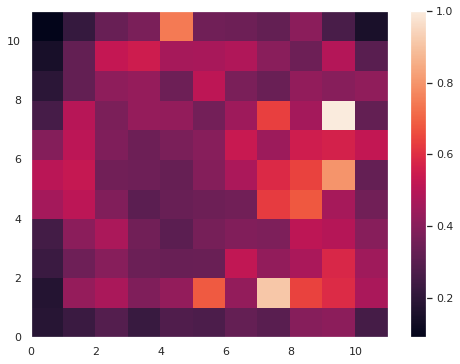

In [ ]:
pcolor(som.distance_map().T)
colorbar()

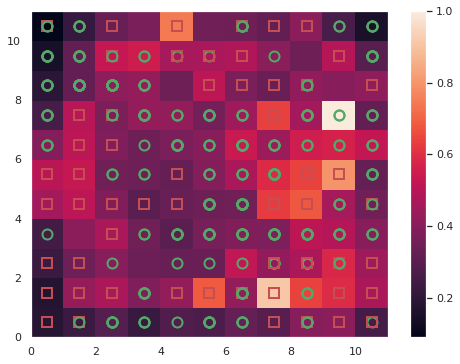

In [ ]:
pcolor(som.distance_map().T)
colorbar()
w = som.winner(Xn[0]) # neuronio vencedor de cada registro (similiaridade)
                        # winner / best matching unit 
markers = ['o', 's']
color = ['g', 'r']

for i, x in enumerate(Xn):
    #print(i)
    #print(x)
    w = som.winner(x)
    #print(w)
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[Y[i]],
         markerfacecolor='None', markersize = 10,
         markeredgecolor = color[Y[i]], markeredgewidth = 2)

# classificação

In [ ]:
# treinamento e teste
# 75% e 25%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [ ]:
# feature scaling / normalizar o intervalo de variáveis ​​independentes
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# funcao para os modelos
def algdeclass(x, y):
    #regressao logistica
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(random_state=0)
    lr.fit(x, y)

    #k-nearest neighbours
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)

    #arvore de decisao
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(x, y)

    #floresta aleatoria
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
    forest.fit(x, y)

    return lr, knn, tree, forest

modelos = ['Regressão Logística', 'KNN', 'Árvore de decisão', 'Floresta Aleatória']

In [ ]:
algdeclass = algdeclass(X_train, Y_train)

In [ ]:
# matriz de confusão: testando acurácia do modelo nos dados de teste
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, algdeclass[0].predict(X_test))

In [ ]:
positivo = cm[0][0]
negativo = cm[1][1]
falsoNegativo = cm[1][0]
falsoPositivo = cm[0][1]

print('Matriz de confusão:')
print(cm)
# positivos, falso positivo
# falso negativo, negativo

print('\nAcurácia do teste:\n', (positivo + negativo)/(positivo 
                                                    + negativo 
                                                    + falsoNegativo 
                                                    + falsoPositivo))

Matriz de confusão:
[[87  3]
 [ 2 51]]

Acurácia do teste:
 0.965034965034965


In [ ]:
for i in range(len(algdeclass)):
    print('modelo', i)
    print(modelos[i])
    print('')
    cm = confusion_matrix(Y_test, algdeclass[i].predict(X_test))
    positivo = cm[0][0]
    negativo = cm[1][1]
    falsoNegativo = cm[1][0]
    falsoPositivo = cm[0][1]
    print(cm)

    print('Acurácia do teste: ', (positivo + negativo)/(positivo
                                                        + negativo
                                                        + falsoNegativo 
                                                        + falsoPositivo))
    print('')

modelo 0
Regressão Logística

[[86  4]
 [ 3 50]]
Acurácia do teste:  0.951048951048951

modelo 1
KNN

[[89  1]
 [ 6 47]]
Acurácia do teste:  0.951048951048951

modelo 2
Árvore de decisão

[[83  7]
 [ 2 51]]
Acurácia do teste:  0.9370629370629371

modelo 3
Floresta Aleatória

[[87  3]
 [ 2 51]]
Acurácia do teste:  0.965034965034965



In [90]:
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
for i in range(len(algdeclass)):
    print('modelo: ', modelos[i])
    print('Classification Report:\n ',classification_report(Y_test, algdeclass[i].predict(X_test)))
    print('Acurácia: ', accuracy_score(Y_test, algdeclass[i].predict(X_test)))
    print('')

modelo:  Regressão Logística
Classification Report:
                precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

Acurácia:  0.951048951048951

modelo:  KNN
Classification Report:
                precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

Acurácia:  0.951048951048951

modelo:  Árvore de decisão
Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96

In [ ]:
predtrain = algdeclass[3].predict(X_train)
print(predtrain)
print('')
print(Y_train)

[0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0]

[0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 

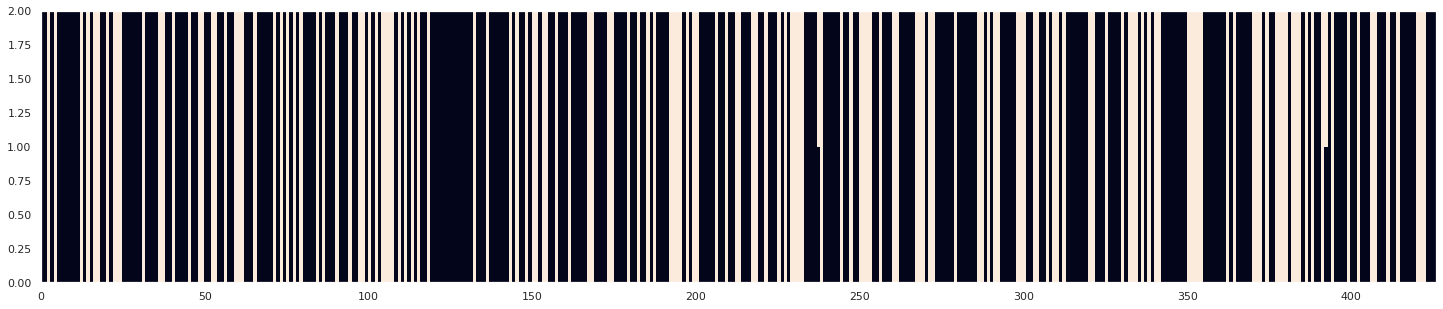

In [ ]:
plt.figure(figsize=(25, 5))
pcolor([predtrain, Y_train])

In [ ]:
predtest = algdeclass[3].predict(X_test)
print(predtest)
print('')
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


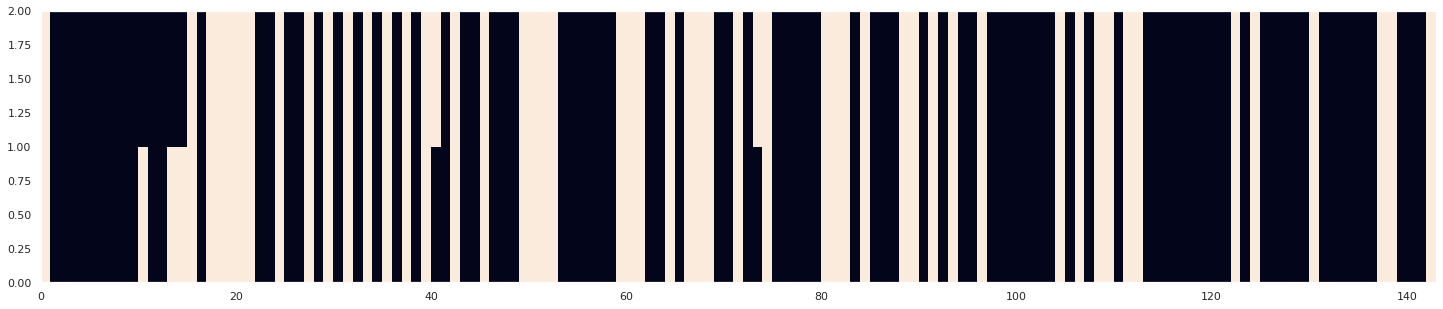

In [ ]:
plt.figure(figsize=(25, 5))
pcolor([predtest, Y_test])

In [ ]:
predtest2 = algdeclass[2].predict(X_test)
print(predtest2)
print('')
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


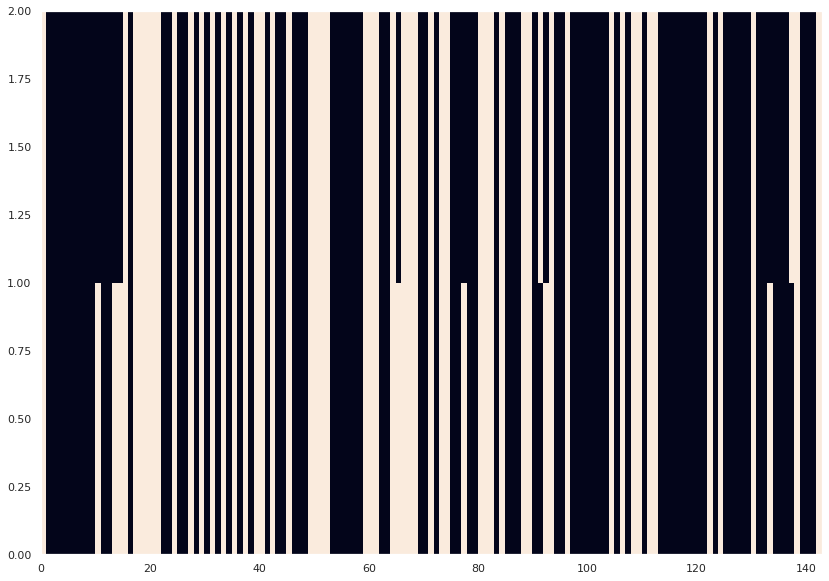

In [ ]:
plt.figure(figsize=(14, 10))
pcolor([predtest2, Y_test])